In [81]:
import os

# Define the path to the output folder
output_folder = "../../output/leafSize"

# Get a list of all subfolders in the output folder
subfolders = [f.path for f in os.scandir(output_folder) if f.is_dir()]

# Initialize an empty list to store the contents of the output files
output_lines = []

# Iterate over each subfolder
for subfolder in subfolders:
    # Define the path to the output file in the current subfolder
    output_file = os.path.join(subfolder, "output.csv")
    
    # Read the contents of the output file
    with open(output_file, "r") as file:
        lines = file.readlines()
    
    # Append the lines to the output_lines list
    output_lines.extend(lines)

# Define the path to the merged output file
merged_file = os.path.join(".", "merged.csv")

# Write the merged output lines to the merged output file
with open(merged_file, "w") as file:
    file.writelines(output_lines)


In [82]:
with open('./merged.csv', 'r') as file:
    lines = file.readlines()

# Remove all spaces in all rows
lines = [line.replace(' ', '') for line in lines]

# Remove lines that are the same as the first one
header = lines[0]
lines = [line for line in lines[1:] if line != lines[0]]

# Join the lines back into a single string
output = ''.join(lines)

# Save the output to a file
with open('preprocessed.csv', 'w') as file:
    file.write(header)
    file.write(output)


In [83]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('preprocessed.csv')
df = df[df['time'] != 0]
df.drop('run_id', axis=1, inplace=True)
df.drop('bin_name', axis=1, inplace=True)

# Display the DataFrame
df.to_csv('preprocessed.csv', index=False)


In [84]:
# Drop columns where all values are the same
df = df.loc[:, df.nunique() != 1]
df.drop(['cycle', 'instr', 'LLC_miss','L1_miss', 'br_miss', 'counted_final_key_count', 'GHz', 'task', 'IPC','rand_seed'], axis=1, inplace=True)


In [85]:
df['space_use'] = df['nodeCount_Leaf'] * df['const_pageSizeLeaf'] / df['data_size'] #space use per record 

df['time_per_op'] = df['time'] / df['scale']
df.drop(['time', 'scale'], axis=1, inplace=True)



In [86]:
df.drop(['nodeCount_Leaf', 'nodeCount_Inner', 'space_use'], axis=1, inplace=True)


In [87]:
df_c = df[df['op'] == 'ycsb_c']
df_c_init = df[df['op'] == 'ycsb_c_init']
df_e = df[df['op'] == 'ycsb_e']
df_e_init = df[df['op'] == 'ycsb_e_init']

df_c.drop('op', axis=1, inplace=True)
df_c_init.drop('op', axis=1, inplace=True)
df_e.drop('op', axis=1, inplace=True)
df_e_init.drop('op', axis=1, inplace=True)



/tmp/ipykernel_889/3873483990.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c.drop('op', axis=1, inplace=True)
/tmp/ipykernel_889/3873483990.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c_init.drop('op', axis=1, inplace=True)
/tmp/ipykernel_889/3873483990.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e.drop('op', axis=1, inplace=True)
/tmp/ipykernel_889/3873483990.py:9: SettingWithCopyWarning: 
A value is tr

In [139]:
df_c_int = df_c[df_c['data_name'].str.contains('int')]
df_c_urls = df_c[df_c['data_name'].str.contains('data/urls')]

df_c_init_int = df_c_init[df_c_init['data_name'].str.contains('int')]
df_c_init_urls = df_c_init[df_c_init['data_name'].str.contains('data/urls')]

df_e_int = df_e[df_e['data_name'].str.contains('int')]
df_e_urls = df_e[df_e['data_name'].str.contains('data/urls')]

df_e_init_int = df_e_init[df_e_init['data_name'].str.contains('int')]
df_e_init_urls = df_e_init[df_e_init['data_name'].str.contains('data/urls')]

df_c_int.drop('data_name', axis=1, inplace=True)
df_c_urls.drop('data_name', axis=1, inplace=True)

df_c_init_int.drop('data_name', axis=1, inplace=True)
df_c_init_urls.drop('data_name', axis=1, inplace=True)

df_e_int.drop('data_name', axis=1, inplace=True)
df_e_urls.drop('data_name', axis=1, inplace=True)

df_e_init_int.drop('data_name', axis=1, inplace=True)
df_e_init_urls.drop('data_name', axis=1, inplace=True)



/tmp/ipykernel_889/2498170498.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c_int.drop('data_name', axis=1, inplace=True)
/tmp/ipykernel_889/2498170498.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c_urls.drop('data_name', axis=1, inplace=True)
/tmp/ipykernel_889/2498170498.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c_init_int.drop('data_name', axis=1, inplace=True)
/tmp/ipykernel_889/2498170498.py:17: 

In [140]:
import matplotlib.pyplot as plt

def boxplot(datasets, labels, title, ylabel, column):
    # Create a boxplot of the data_size column for each dataset
    data_to_plot = [dataset[column] for dataset in datasets]

    # Create the boxplot
    plt.boxplot(data_to_plot)

    # Set the title and labels
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xticks(range(1, len(labels) + 1), labels)

    # Show the plot
    plt.show()

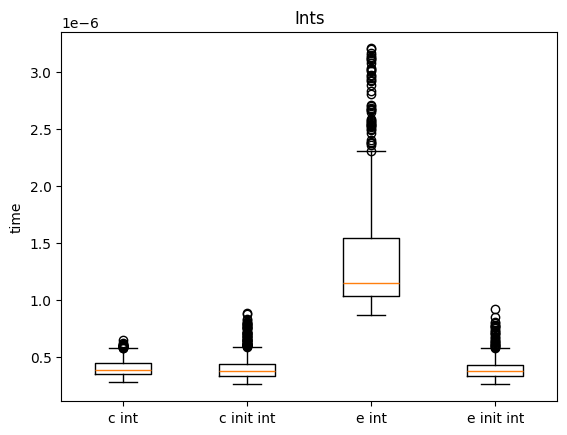

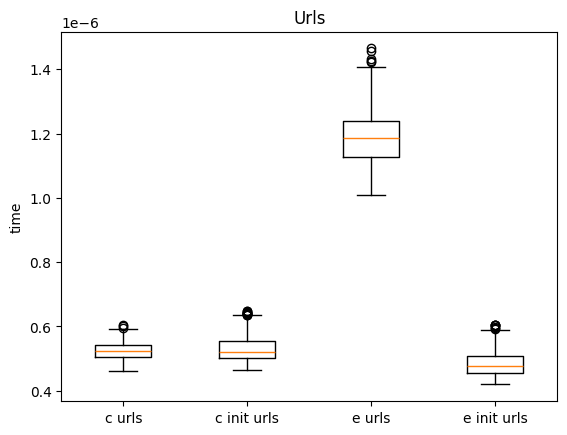

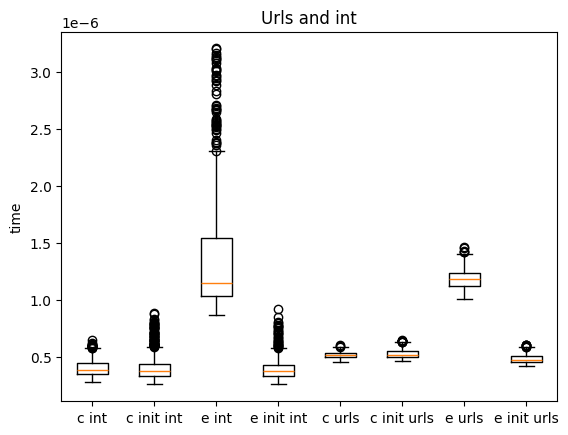

In [141]:
boxplot(
    [df_c_int, df_c_init_int, df_e_int, df_e_init_int],
    ['c int', 'c init int', 'e int', 'e init int'],
    'Ints', 'time', 'time_per_op'
)
boxplot(
    [df_c_urls, df_c_init_urls, df_e_urls, df_e_init_urls],
    ['c urls', 'c init urls', 'e urls', 'e init urls'],
    'Urls', 'time', 'time_per_op'
)
boxplot(
    [df_c_int, df_c_init_int, df_e_int, df_e_init_int, df_c_urls, df_c_init_urls, df_e_urls, df_e_init_urls],
    ['c int', 'c init int', 'e int', 'e init int', 'c urls', 'c init urls', 'e urls', 'e init urls'],
    'Urls and int', 'time', 'time_per_op'
)

In [142]:
df_c_int

,const_pageSizeLeaf,data_size,payload_size,time_per_op
5,256,21111784,13,4.919000e-07
13,4096,38006857,9,3.715000e-07
19,512,42353725,8,5.025000e-07
27,2048,55137391,6,4.169000e-07
29,512,40116717,6,5.019000e-07
...,...,...,...,...
6499,2048,74594701,0,4.236000e-07
6507,32768,31310205,5,3.546000e-07
6509,4096,13231413,10,3.268000e-07
6513,256,20706489,9,4.872000e-07


In [143]:
categorical_columns = df_c_int.select_dtypes(include='object').columns
print(categorical_columns)
column_value_counts = df_c_int.nunique()
print(column_value_counts)


Index([], dtype='object')
const_pageSizeLeaf       8
data_size             1213
payload_size            16
time_per_op            935
dtype: int64


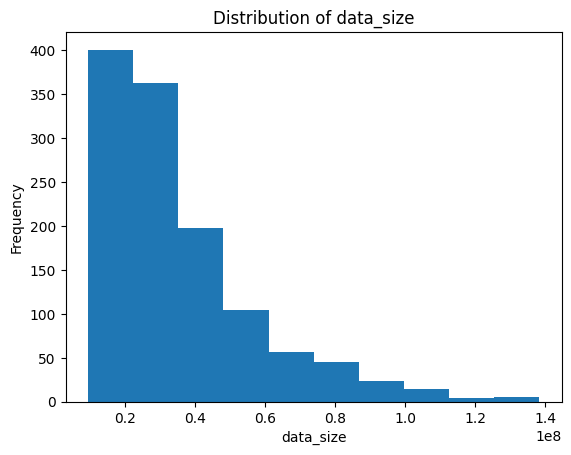

In [144]:
import matplotlib.pyplot as plt

# Create a histogram of the data_size column
plt.hist(df_c_int['data_size'], bins=10)

# Set the title and labels
plt.title('Distribution of data_size')
plt.xlabel('data_size')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [145]:
def group_data(input_df):
    # Create a new column 'data_size_group' that divides 'data_size' into quantiles
    input_df['data_size_group'] = pd.qcut(input_df['data_size'], q=5, labels=False)  + 1
    # Drop the 'data_size' column
    input_df.drop('data_size', axis=1, inplace=True)

    # Group the data by 'const_pageSizeLeaf', 'data_size_group', and 'payload_size'
    grouped = input_df.groupby(['const_pageSizeLeaf', 'payload_size', 'data_size_group'])
    return grouped.mean().reset_index()

In [146]:
def getWinners(input_df):
    combinations = input_df[['payload_size', 'data_size_group']].drop_duplicates()
    input_df= input_df.sort_values(by='time_per_op')
    winners=[]
    # go through all combinations of payload_size and data_size_group and find the corresponding const_pageSizeLeaf and time_per_op
    for index, row in combinations.iterrows():
        payload_size = row['payload_size']
        data_size_group = row['data_size_group']
        const_pageSizeLeaf = input_df[
            (input_df['payload_size'] == payload_size) &
            (input_df['data_size_group'] == data_size_group)
        ]['const_pageSizeLeaf'].values
        time_per_op = input_df[
            (input_df['payload_size'] == payload_size) &
            (input_df['data_size_group'] == data_size_group)
        ]['time_per_op'].values
        winners.append(const_pageSizeLeaf[0])
        #print(f"Combination: payload_size={payload_size}, data_size_group={data_size_group}, const_pageSizeLeaf={const_pageSizeLeaf}, time_per_op={time_per_op}")
    return winners

In [147]:
def plotWinners(winners, title):
    import pandas as pd
    import matplotlib.pyplot as plt

    # Convert the winners array to a pandas Series
    winners_series = pd.Series(winners)

    # Count the frequencies of the values
    value_counts = winners_series.value_counts()

    # Create a bar chart of the frequencies
    value_counts.plot(kind='bar')

    # Set the title and labels
    plt.title(title+ ': Frequencies of Winners')
    plt.xlabel('Winners')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

/tmp/ipykernel_889/3493240731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['data_size_group'] = pd.qcut(input_df['data_size'], q=5, labels=False)  + 1
/tmp/ipykernel_889/3493240731.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df.drop('data_size', axis=1, inplace=True)


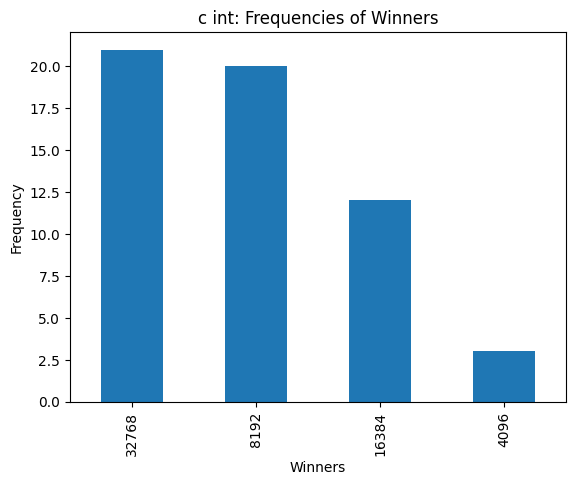

/tmp/ipykernel_889/3493240731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['data_size_group'] = pd.qcut(input_df['data_size'], q=5, labels=False)  + 1
/tmp/ipykernel_889/3493240731.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df.drop('data_size', axis=1, inplace=True)


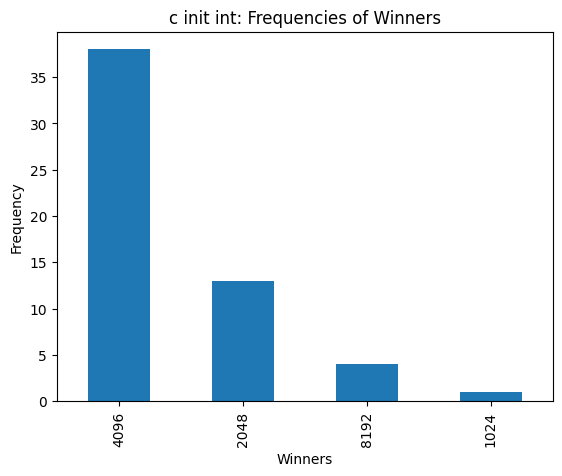

/tmp/ipykernel_889/3493240731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['data_size_group'] = pd.qcut(input_df['data_size'], q=5, labels=False)  + 1
/tmp/ipykernel_889/3493240731.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df.drop('data_size', axis=1, inplace=True)


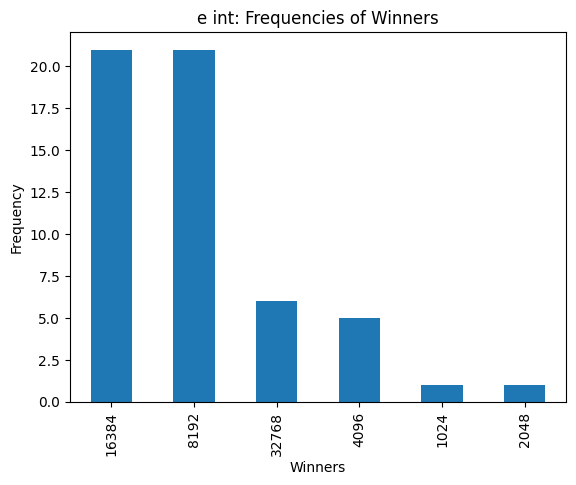

/tmp/ipykernel_889/3493240731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['data_size_group'] = pd.qcut(input_df['data_size'], q=5, labels=False)  + 1
/tmp/ipykernel_889/3493240731.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df.drop('data_size', axis=1, inplace=True)


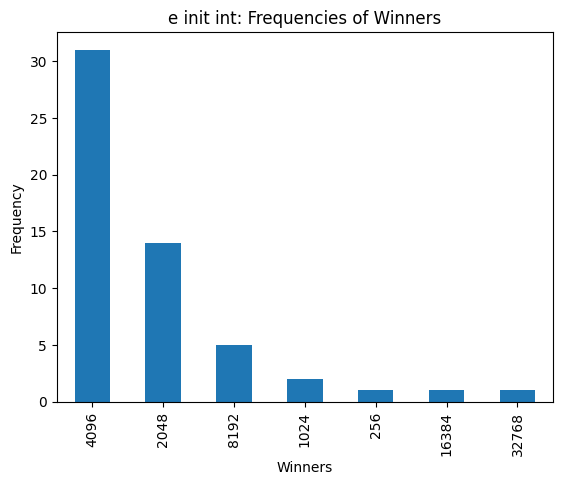

/tmp/ipykernel_889/3493240731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['data_size_group'] = pd.qcut(input_df['data_size'], q=5, labels=False)  + 1
/tmp/ipykernel_889/3493240731.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df.drop('data_size', axis=1, inplace=True)


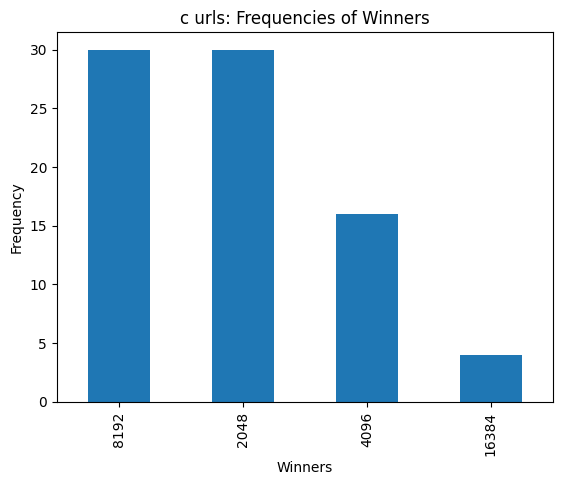

/tmp/ipykernel_889/3493240731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['data_size_group'] = pd.qcut(input_df['data_size'], q=5, labels=False)  + 1
/tmp/ipykernel_889/3493240731.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df.drop('data_size', axis=1, inplace=True)


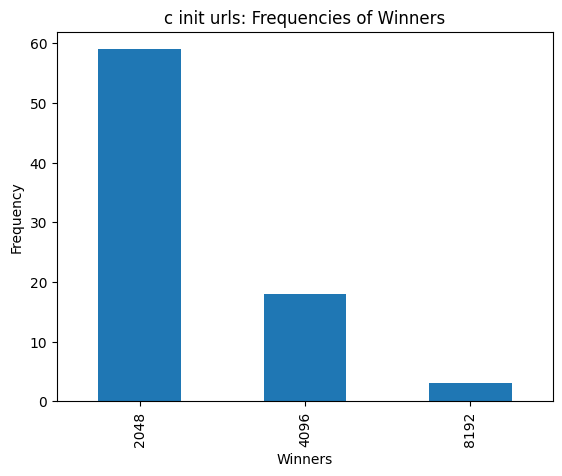

/tmp/ipykernel_889/3493240731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['data_size_group'] = pd.qcut(input_df['data_size'], q=5, labels=False)  + 1
/tmp/ipykernel_889/3493240731.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df.drop('data_size', axis=1, inplace=True)


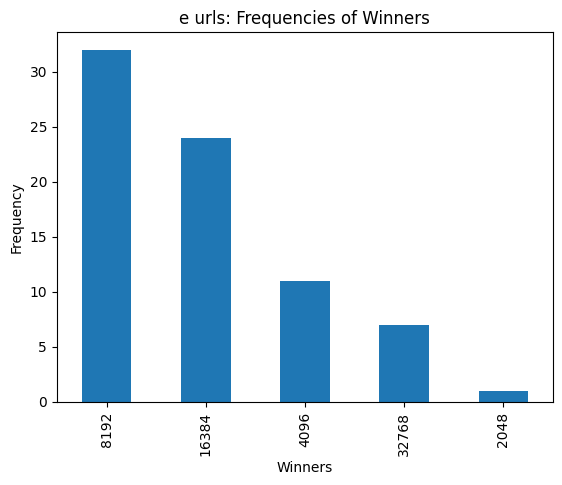

/tmp/ipykernel_889/3493240731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['data_size_group'] = pd.qcut(input_df['data_size'], q=5, labels=False)  + 1
/tmp/ipykernel_889/3493240731.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df.drop('data_size', axis=1, inplace=True)


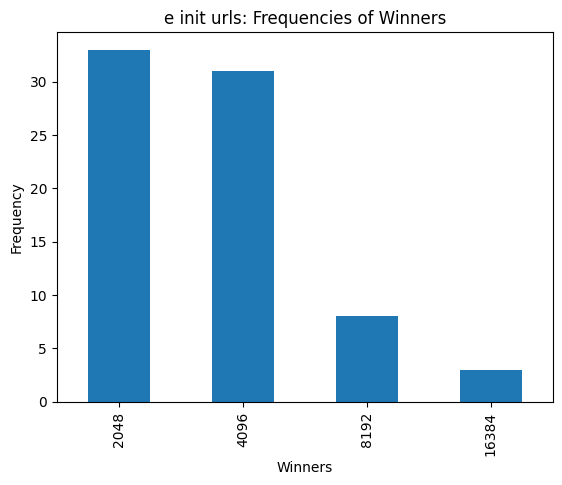

In [148]:
allDatasets=[df_c_int, df_c_init_int, df_e_int, df_e_init_int, df_c_urls, df_c_init_urls, df_e_urls, df_e_init_urls]
dataset_titles = ['c int', 'c init int', 'e int', 'e init int', 'c urls', 'c init urls', 'e urls', 'e init urls']
for i,data in enumerate(allDatasets):
    grouped = group_data(data)
    winners = getWinners(grouped)
    plotWinners(winners, dataset_titles[i])
    